In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [6]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

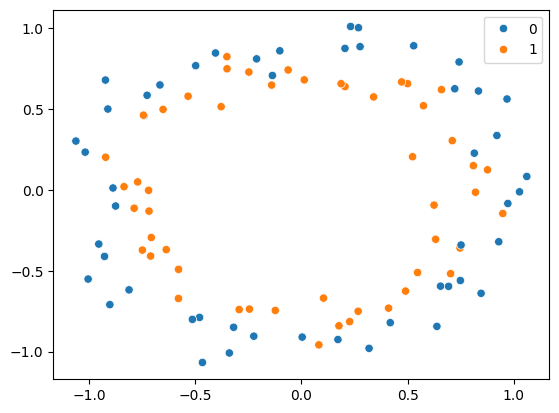

In [8]:
sns.scatterplot(x= X[:,0],y=X[:,1],hue=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [10]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

<function matplotlib.pyplot.show(close=None, block=None)>

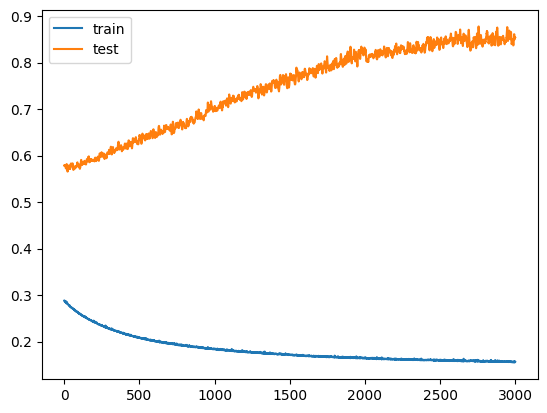

In [17]:
plt.plot(history.history['loss'],label=['train'])
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


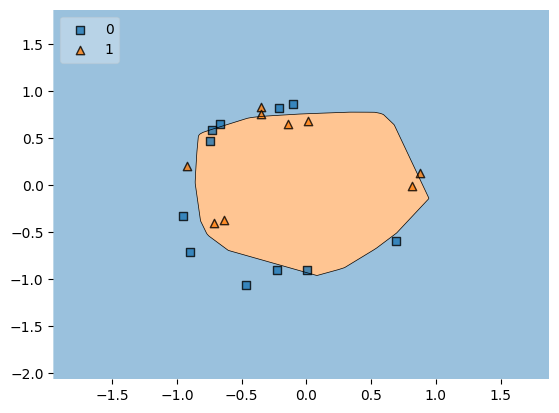

In [18]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

Early stopping

In [19]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5328 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5570 - loss: 0.6912 - val_accuracy: 0.4500 - val_loss: 0.6962
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5266 - loss: 0.6920 - val_accuracy: 0.4000 - val_loss: 0.6965
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5422 - loss: 0.6900 - val_accuracy: 0.4000 - val_loss: 0.6966
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5602 - loss: 0.6882 - val_accuracy: 0.4500 - val_loss: 0.6972
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5320 - loss: 0.6881 - val_accuracy: 0.4500 - val_loss: 0.6974
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5109 - loss: 0.6892 - val_accuracy: 0.4000 - val_loss: 0.6983
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5758 - loss: 0.6830 - val_accuracy: 0.4500 -

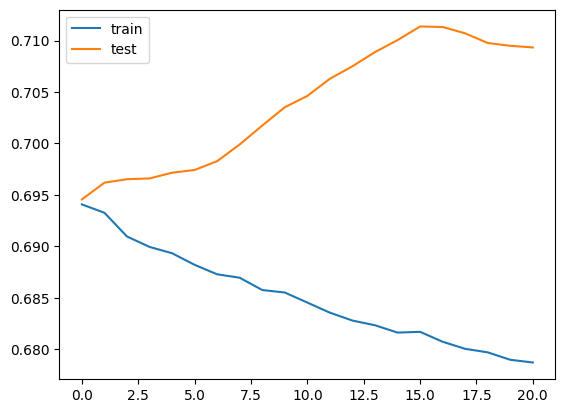

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


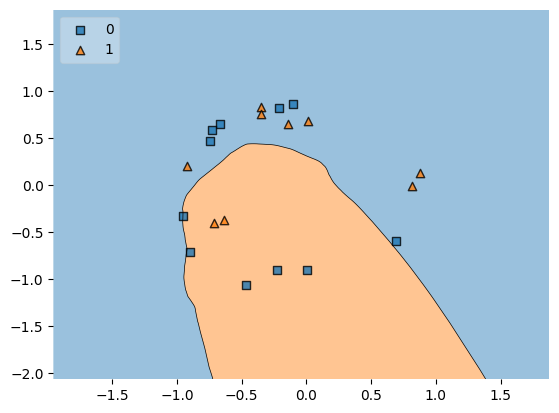

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()